In [1]:
import os
import omegaconf
from shell.utils.experiment_utils import *
from shell.utils.metric import *
import matplotlib.pyplot as plt
from shell.fleet.network import TopologyGenerator

In [2]:
save_root_dir = "full_data_results"
dataset = "mnist"
algo = "monolithic"
seed = 0

In [3]:
experiment = os.path.join(save_root_dir, f"{dataset}_{algo}", dataset,algo, f"seed_{seed}")

In [4]:
config_path = os.path.join(experiment, "hydra_out", ".hydra", "config.yaml")
# read the config file
cfg = omegaconf.OmegaConf.load(config_path)
cfg

{'train': {'component_update_freq': 100, 'num_epochs': 100, 'save_freq': 1}, 'dataset': {'dataset_name': 'mnist', 'num_tasks': 10, 'num_classes_per_task': 2, 'with_replacement': True, 'num_trains_per_class': -1, 'num_vals_per_class': -1, 'remap_labels': False}, 'net': {'name': 'mlp', 'depth': 4, 'num_init_tasks': 4, 'layer_size': 64, 'dropout': 0.5, 'freeze_encoder': True}, 'sharing_strategy': {'name': 'no_sharing'}, 'seed': 0, 'algo': 'monolithic', 'job_name': 'mnist_monolithic', 'num_agents': 4, 'root_save_dir': 'full_data_results', 'agent': {'save_dir': '${root_save_dir}/${job_name}/${dataset.dataset_name}/${algo}/seed_${seed}', 'batch_size': 64, 'memory_size': 64, 'improvement_threshold': 0.05}}

In [5]:
graph, datasets, NetCls, LearnerCls, net_cfg, agent_cfg, train_cfg = setup_experiment(cfg)
len(datasets)

{'train': {'component_update_freq': 100, 'num_epochs': 100, 'save_freq': 1}, 'dataset': {'dataset_name': 'mnist', 'num_tasks': 10, 'num_classes_per_task': 2, 'with_replacement': True, 'num_trains_per_class': -1, 'num_vals_per_class': -1, 'remap_labels': False}, 'net': {'name': 'mlp', 'depth': 4, 'num_init_tasks': 4, 'layer_size': 64, 'dropout': 0.5, 'freeze_encoder': True}, 'sharing_strategy': {'name': 'no_sharing'}, 'seed': 0, 'algo': 'monolithic', 'job_name': 'mnist_monolithic', 'num_agents': 4, 'root_save_dir': 'full_data_results', 'agent': {'save_dir': '${root_save_dir}/${job_name}/${dataset.dataset_name}/${algo}/seed_${seed}', 'batch_size': 64, 'memory_size': 64, 'improvement_threshold': 0.05}}
i_size 28
num_classes 10
net_cfg {'name': 'mlp', 'depth': 4, 'num_init_tasks': 4, 'layer_size': 64, 'dropout': 0.5, 'freeze_encoder': True, 'i_size': 28, 'num_classes': 10, 'num_tasks': 10}
<class 'shell.learners.er_nocomponents.NoComponentsER'>


4

In [6]:
classes_sequence_list = [dataset.class_sequence for dataset in datasets]
classes_sequence_list

[array([5, 0, 4, 3, 4, 6, 4, 3, 8, 0, 1, 0, 5, 9, 6, 4, 9, 0, 3, 0]),
 array([4, 7, 5, 7, 6, 0, 3, 0, 5, 0, 3, 6, 2, 7, 6, 7, 6, 1, 0, 5]),
 array([6, 7, 7, 8, 4, 1, 1, 8, 6, 1, 6, 4, 5, 7, 8, 0, 2, 3, 0, 3]),
 array([2, 8, 0, 3, 7, 4, 3, 4, 4, 5, 9, 3, 0, 6, 9, 1, 3, 1, 7, 9])]

In [7]:
df_sim = task_similarity(classes_sequence_list, cfg.dataset.num_tasks, cfg.dataset.num_classes_per_task)

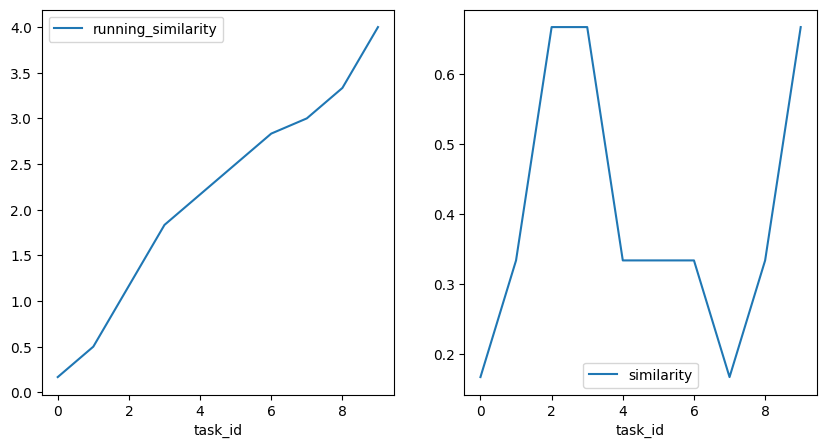

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
df_sim.groupby("task_id").mean()['similarity'].plot(legend=True, label="similarity")
plt.subplot(1, 2, 1)
df_sim.groupby("task_id").mean()['running_similarity'].plot(legend=True, label="running_similarity");

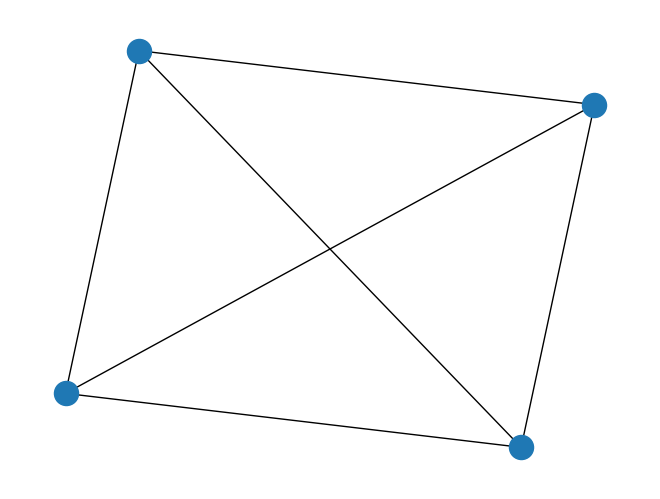

In [9]:
import networkx as nx
nx.draw(graph)

In [ ]:
# from shell.fleet.fleet import Fleet
# from shell.fleet.gradient_fleet import ModelSyncAgent
# num_coms_per_round = 1
# AgentCls = ModelSyncAgent

# fleet = Fleet(graph, cfg.seed, datasets, num_coms_per_round, AgentCls, NetCls=NetCls,
#                 LearnerCls=LearnerCls, net_kwargs=net_cfg, agent_kwargs=agent_cfg,
#                 train_kwargs=train_cfg)
# # for task_id in range(cfg.dataset.num_tasks):
# for task_id in range(2): 
#     fleet.communicate(task_id)

In [ ]:
from shell.fleet.fleet import Fleet
from shell.fleet.monograd import ModelSyncAgent
num_coms_per_round = 1
AgentCls = ModelSyncAgent

fleet = Fleet(graph, cfg.seed, datasets, num_coms_per_round, AgentCls, NetCls=NetCls,
                LearnerCls=LearnerCls, net_kwargs=net_cfg, agent_kwargs=agent_cfg,
                train_kwargs=train_cfg)
# for task_id in range(cfg.dataset.num_tasks):
for task_id in range(2): 
    fleet.communicate(task_id)